# Impacto Económico Personal
Laureta es una Profesora de Ballet Licenciada en Arte Danzario que regresa a Cuba después de 10 años trabajando en el exterior, después de 6 meses ya se está adaptando a sú país natal de nuevo, pero varias cosas han cambiado, pero una de sus mayores inquietudes es el salario, y quiere saber si con su salario puede invitar a su hijo a un bar/restaurante para celebrar su cumpleaños 18.

## Bibliotecas

In [22]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
from modules import contacts, percent, places, boolean

## Salario

In [23]:
df = pd.DataFrame(columns=['Grupos', 'Jornada de 40 horas (Semanales) CUP', 'Jornada de 44 horas (Semanales) CUP'])

with open('salaries.json', 'r') as file:
    data = json.load(file)

    for i in range(0, len(data)):
        items = data[i]
        df.loc[i] = [data[i]['group'], data[i]['40_hours'],data[i]['44_hours']]
df

,Grupos,Jornada de 40 horas (Semanales) CUP,Jornada de 44 horas (Semanales) CUP
0,01,1910,2100
1,02,2000,2200
2,03,2090,2300
3,04,2200,2420
4,05,2310,2540
5,06,2415,2660
6,07,2555,2810
7,08,2690,2960
8,09,2825,3110
9,10,2965,3260


El salario de Laureta es de 4375 CUP del grupo 17.

# Establecimientos

Laureta quiere saber cuántos establecimientos hay en la capital habanera.

In [64]:
json_folder = 'bars_restaurants'

json_list = []

json_list = []
list_facebook = []
list_instagram = []
list_whatsapp = []
list_web = []
list_telephone = []

for file in os.listdir(json_folder):
    if file.endswith('.json'):
        file_access = os.path.join(json_folder, file)
        
        with open(file_access, 'r') as files:
            datas = json.load(files)
            json_list.append(datas)
        
        if "contact" in datas:
            contact = datas['contact']
            contacts(contact, 'facebook', list_facebook)
            contacts(contact, 'instagram', list_instagram)
            contacts(contact, 'whatsapp', list_whatsapp)
            contacts(contact, 'web', list_web)
            contacts(contact, 'telephone', list_telephone)

# JSON DataFrame
df = pd.json_normalize(json_list)

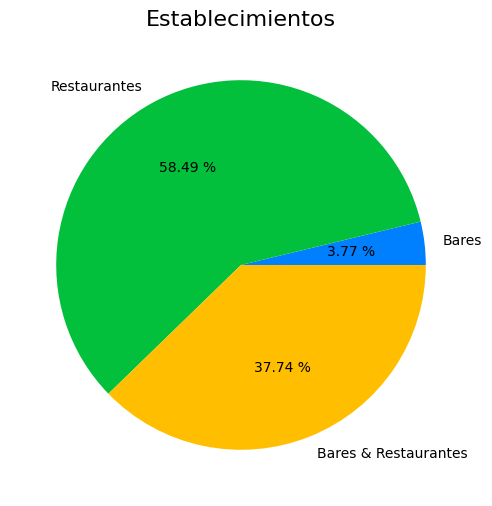

In [63]:
df_bar = df[df['establishment'].apply(lambda x: x == ['bar'])]
df_restaurant = df[df['establishment'].apply(lambda x: x == ['restaurante'])]
df_bar_restaurant = df[df['establishment'].apply(lambda x: x == ['bar', 'restaurante'])]

# Porcentaje de Establecimiento de cada Tipo
percent_bar = percent(df_bar, json_list)
percent_restaurant = percent(df_restaurant, json_list)
percent_bar_restaurant = percent(df_bar_restaurant, json_list)

# Gráfica Círcular
x = ['Bares', 'Restaurantes', 'Bares & Restaurantes']
y = [percent_bar, percent_restaurant, percent_bar_restaurant]

plt.figure(figsize=(6, 6))
plt.pie(y, labels=x, autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Establecimientos', fontsize=('16'))
plt.show()

Pero quieren saber con más exactitud qué cantidad exacta hay de cada tipo de establecimiento en cada municipio.

### Bares

In [26]:
df_pl = places(df, ['bar'], 'playa')
df_re = places(df, ['bar'], 'regla')
df_ma = places(df, ['bar'], 'marianao')
df_an = places(df, ['bar'], 'arrotyo naranjo')
df_pr = places(df, ['bar'], 'plaza de la revolución')
df_he = places(df, ['bar'], 'habana del este')

Text(0, 0.5, 'Municipios')

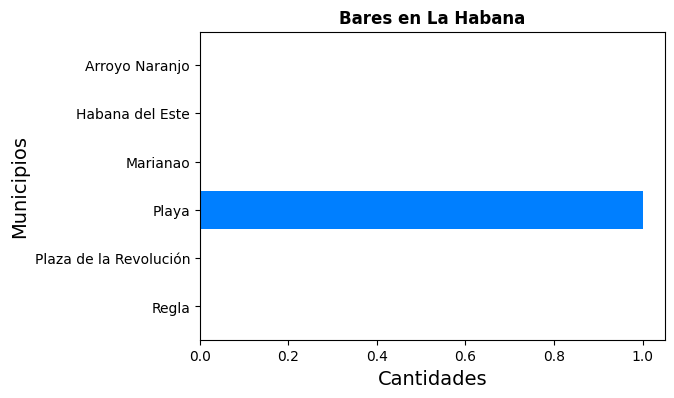

In [27]:
establishments = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_pl),
    len(df_re),
    len(df_ma),
    len(df_an),
    len(df_pr),
    len(df_he)
]

plt.figure(figsize=(6, 4))
plt.barh(establishments[::-1], values, color=['#007FFF'])
plt.title('Bares en La Habana', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Restaurantes

In [28]:
df_pl = places(df, ['restaurante'], 'playa')
df_re = places(df, ['restaurante'], 'regla')
df_ma = places(df, ['restaurante'], 'marianao')
df_an = places(df, ['restaurante'], 'arrotyo naranjo')
df_pr = places(df, ['restaurante'], 'plaza de la revolución')
df_he = places(df, ['restaurante'], 'habana del este')

Text(0, 0.5, 'Municipios')

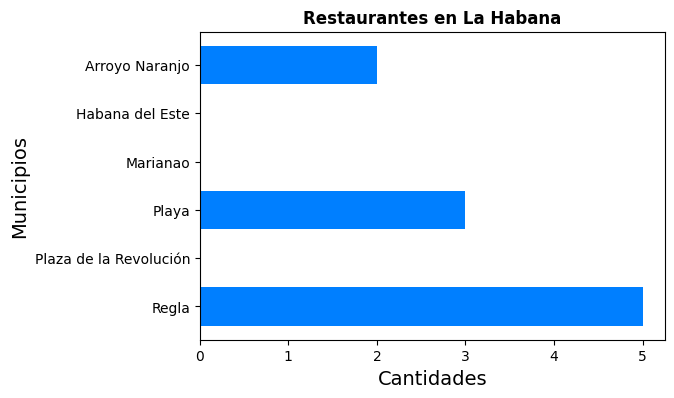

In [29]:
establishments = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_pl),
    len(df_re),
    len(df_ma),
    len(df_an),
    len(df_pr),
    len(df_he)
]

plt.figure(figsize=(6, 4))
plt.barh(establishments[::-1], values, color=['#007FFF'])
plt.title('Restaurantes en La Habana', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Bares & Restaurantes

In [30]:
df_pl = places(df, ['bar', 'restaurante'], 'playa')
df_re = places(df, ['bar', 'restaurante'], 'regla')
df_ma = places(df, ['bar', 'restaurante'], 'marianao')
df_an = places(df, ['bar', 'restaurante'], 'arrotyo naranjo')
df_pr = places(df, ['bar', 'restaurante'], 'plaza de la revolución')
df_he = places(df, ['bar', 'restaurante'], 'habana del este')

Text(0, 0.5, 'Municipios')

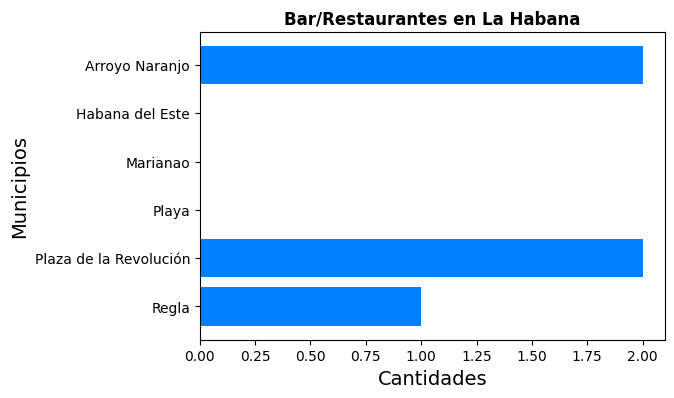

In [31]:
establishments = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_pl),
    len(df_re),
    len(df_ma),
    len(df_an),
    len(df_pr),
    len(df_he)
]

plt.figure(figsize=(6, 4))
plt.barh(establishments[::-1], values, color=['#007FFF'])
plt.title('Bar/Restaurantes en La Habana', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Contacto

Como Laureta recién llegó al país no recuerda donde quedan los lugares o los que recuerda ya cerraron.

Entonces quiere saber de que manera puede contactar a los establecimientos.

El hijo interviene y le dice que los métodos de contactar hoy en día son:

- Redes Sociales
- Teléfonos
- Página Web

In [66]:
percent_facebook = percent(list_facebook, json_list)
percent_instagram = percent(list_instagram, json_list)
percent_whatsapp = percent(list_whatsapp, json_list)
percent_web = percent(list_web, json_list)
percent_telephone = percent(list_telephone, json_list)

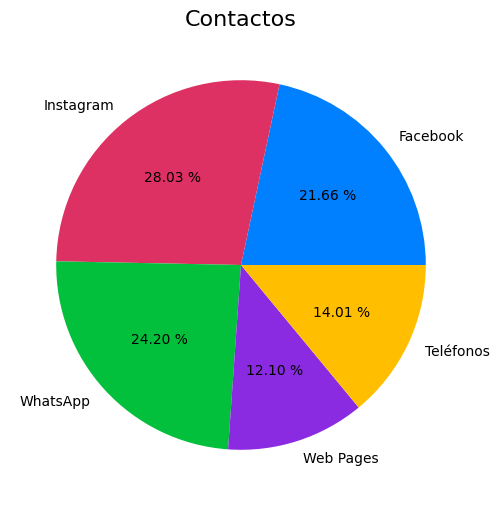

In [67]:
x = ['Facebook', 'Instagram', 'WhatsApp', 'Web Pages', 'Teléfonos']
y = [percent_facebook, percent_instagram, percent_whatsapp, percent_web, percent_telephone]

plt.figure(figsize=(6, 6))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#DE3163', '#03C03C', '#8A2BE2', '#FFBF00'])
plt.title('Contactos', fontsize=('16'))
plt.show()

Al ver lo siguientes datos algunos números no respondían porque al parecer son viejos o vencieron, muy pocos tenían páginas webs, por whatsapp solo se usa para reservar. Entonces decidieron averiguar sobre los establecimientos usando las redes sociales porque es lo que más uso tiene.

## Servicios

Les interesa saber que tipos de servicios ofrecen los restaurantes:

- Entrega a domicilio
- Para llevar
- Reservaciones

En especial lo que le interesa a Laureta es la entrega a domicilio porque no le gusta ir a restaurantes lejanos.

In [35]:
df_delivery = df[df['services.delivery'] == True]
df_to_take = df[df['services.to_take'] == True]
df_reserve = df[df['services.reserve'] == True]

percent_delivery = percent(df_delivery, json_list)
percent_to_take = percent(df_to_take, json_list)
percent_reserve = percent(df_reserve, json_list)

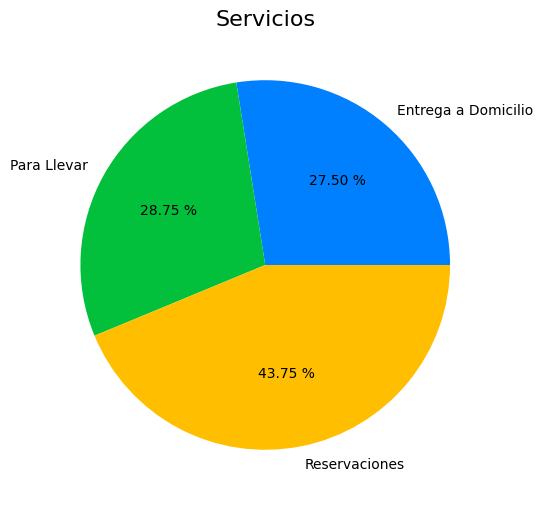

In [59]:
x = ['Entrega a Domicilio', 'Para Llevar', 'Reservaciones']
y = [percent_delivery, percent_to_take, percent_reserve]

plt.figure(figsize=(6, 6))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Servicios', fontsize=('16'))
plt.show()

### Entrega a Domicilio

In [57]:
df_an = boolean(df, 'services.delivery', 'address.town', 'arroyo naranjo')
df_he = boolean(df, 'services.delivery', 'address.town', 'habana del este')
df_ma = boolean(df, 'services.delivery', 'address.town', 'marianao')
df_pl = boolean(df, 'services.delivery', 'address.town', 'playa')
df_pr = boolean(df, 'services.delivery', 'address.town', 'plaza de la revolución')
df_re = boolean(df, 'services.delivery', 'address.town', 'regla')

Text(0, 0.5, 'Municipios')

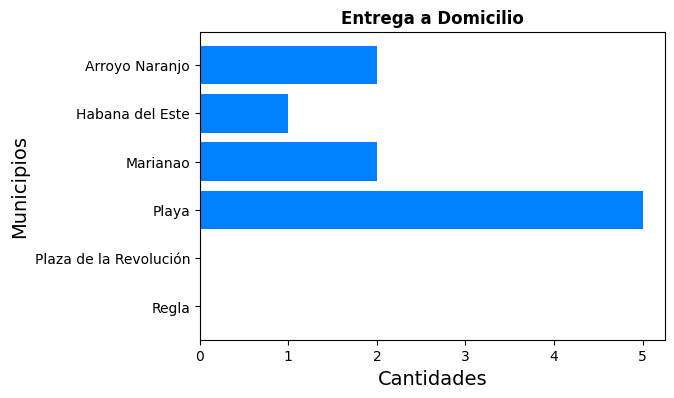

In [58]:
deliveries = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_an),
    len(df_he),
    len(df_ma),
    len(df_pl),
    len(df_pr),
    len(df_re)
]

plt.figure(figsize=(6, 4))
plt.barh(deliveries[::-1], values[::-1], color=['#007FFF'])
plt.title('Entrega a Domicilio', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Para Llevar

In [53]:
df_an = boolean(df, 'services.to_take', 'address.town', 'arroyo naranjo')
df_he = boolean(df, 'services.to_take', 'address.town', 'habana del este')
df_ma = boolean(df, 'services.to_take', 'address.town', 'marianao')
df_pl = boolean(df, 'services.to_take', 'address.town', 'playa')
df_pr = boolean(df, 'services.to_take', 'address.town', 'plaza de la revolución')
df_re = boolean(df, 'services.to_take', 'address.town', 'regla')

Text(0, 0.5, 'Municipios')

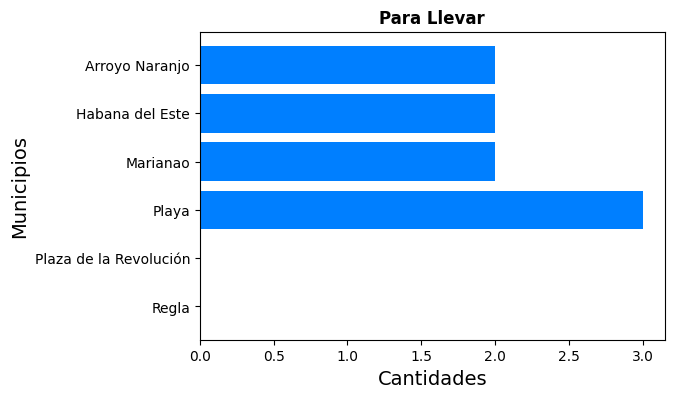

In [54]:
to_take = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_an),
    len(df_he),
    len(df_ma),
    len(df_pl),
    len(df_pr),
    len(df_re)
]

plt.figure(figsize=(6, 4))
plt.barh(to_take[::-1], values[::-1], color=['#007FFF'])
plt.title('Para Llevar', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Reservaciones

In [55]:
df_an = boolean(df, 'services.reserve', 'address.town', 'arroyo naranjo')
df_he = boolean(df, 'services.reserve', 'address.town', 'habana del este')
df_ma = boolean(df, 'services.reserve', 'address.town', 'marianao')
df_pl = boolean(df, 'services.reserve', 'address.town', 'playa')
df_pr = boolean(df, 'services.reserve', 'address.town', 'plaza de la revolución')
df_re = boolean(df, 'services.reserve', 'address.town', 'regla')

Text(0, 0.5, 'Municipios')

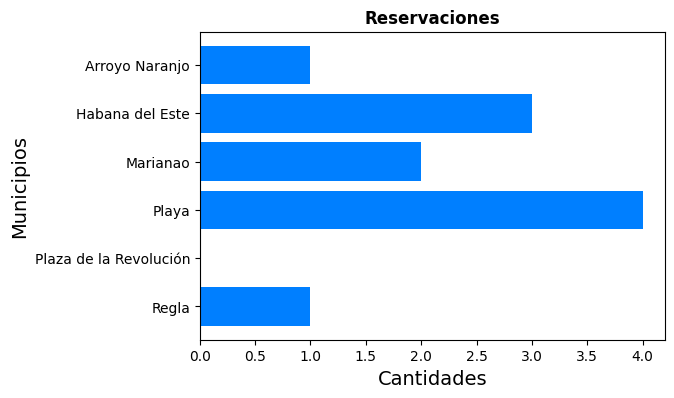

In [56]:
reserves = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_an),
    len(df_he),
    len(df_ma),
    len(df_pl),
    len(df_pr),
    len(df_re)
]

plt.figure(figsize=(6, 4))
plt.barh(reserves[::-1], values[::-1], color=['#007FFF'])
plt.title('Reservaciones', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Métodos de Pago

Le interesa saber que métodos de pago ofrecen porque no tiene para pagar en efectivo, y no puede sacar dinero de los cajeros automáticos porque no tienen dinero suficientes para todos ó en caja solo dan billetes pequeños de 20 ó 50 CUP.

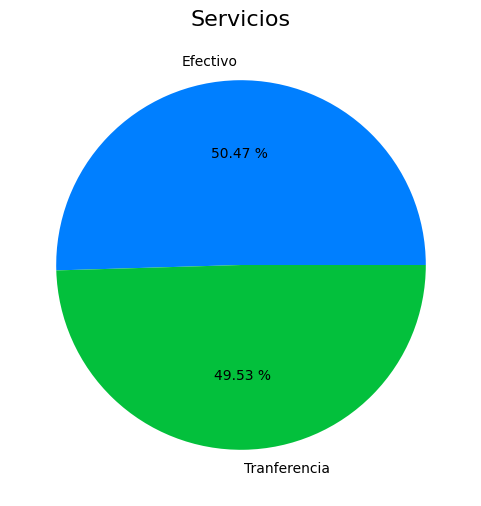

In [52]:
df_cash = df[df['payment.cash'] == True]
df_transfer = df[df['payment.transfer'] == True]

percent_cash = percent(df_cash, json_list)
percent_transfer = percent(df_transfer, json_list)

x = ['Efectivo', 'Tranferencia']
y = [percent_cash, percent_transfer]

plt.figure(figsize=(6, 6))
plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.title('Servicios', fontsize=('16'))
plt.show()

### Efectivo

In [49]:
df_an = boolean(df, 'payment.cash', 'address.town', 'arroyo naranjo')
df_he = boolean(df, 'payment.cash', 'address.town', 'habana del este')
df_ma = boolean(df, 'payment.cash', 'address.town', 'marianao')
df_pl = boolean(df, 'payment.cash', 'address.town', 'playa')
df_pr = boolean(df, 'payment.cash', 'address.town', 'plaza de la revolución')
df_re = boolean(df, 'payment.cash', 'address.town', 'regla')

Text(0, 0.5, 'Municipios')

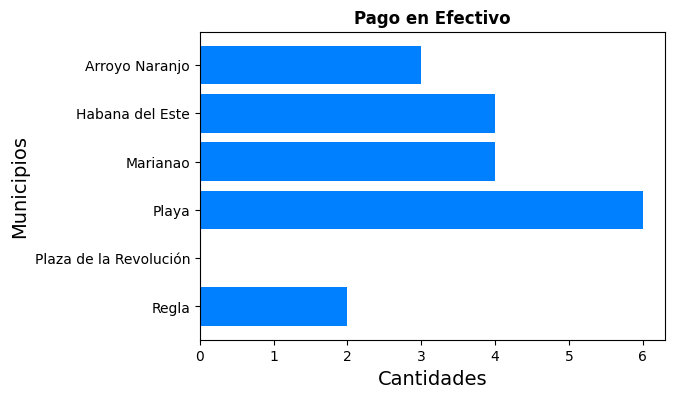

In [50]:
cash = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_an),
    len(df_he),
    len(df_ma),
    len(df_pl),
    len(df_pr),
    len(df_re)
]

plt.figure(figsize=(6, 4))
plt.barh(cash[::-1], values[::-1], color=['#007FFF'])
plt.title('Pago en Efectivo', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

### Transferencia

In [42]:
df_an = boolean(df, 'payment.transfer', 'address.town', 'arroyo naranjo')
df_he = boolean(df, 'payment.transfer', 'address.town', 'habana del este')
df_ma = boolean(df, 'payment.transfer', 'address.town', 'marianao')
df_pl = boolean(df, 'payment.transfer', 'address.town', 'playa')
df_pr = boolean(df, 'payment.transfer', 'address.town', 'plaza de la revolución')
df_re = boolean(df, 'payment.transfer', 'address.town', 'regla')

Text(0, 0.5, 'Municipios')

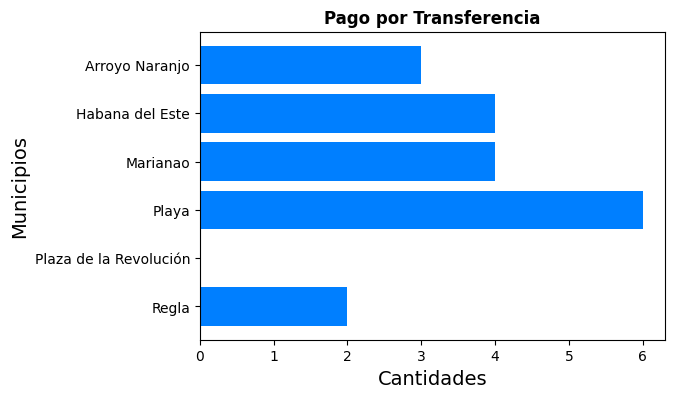

In [48]:
transfer = [
    'Arroyo Naranjo',
    'Habana del Este',
    'Marianao',
    'Playa',
    'Plaza de la Revolución',
    'Regla'
]
values = [
    len(df_an),
    len(df_he),
    len(df_ma),
    len(df_pl),
    len(df_pr),
    len(df_re)
]

plt.figure(figsize=(6, 4))
plt.barh(transfer[::-1], values[::-1], color=['#007FFF'])
plt.title('Pago por Transferencia', fontweight='bold')
plt.xlabel('Cantidades', fontsize='14')
plt.ylabel('Municipios', fontsize='14')

## Precio Apróximado

Cómo se dijo al principio el salario de Laureta es de 4375 CUP y quiere saber lo mínimo que necesita para ir a un establecimiento.